In [1]:
#importing libraries
import numpy as np
import pandas as pd
import math
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# to display interaxtive graphs
import plotly.express as px
import plotly.io as pio

# saving model file
import pickle
import joblib

In [2]:
dataset = pd.read_csv('Crimes_2001_to_Present.csv',low_memory=False)
 
dataset = dataset.head(100000)

In [3]:
num_rows = dataset.shape[0]
num_rows

100000

In [4]:
dataset.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [5]:
# droping the features that are not usefull
dataset=dataset.drop(columns=['IUCR','Case Number','Description','FBI Code','Updated On','Block'])

In [6]:
# X.shape
print('Columns in dataset: ', dataset.columns)

Columns in dataset:  Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


In [7]:
dataset 

ID                    Date        Primary Type  \
0      10224738  09/05/2015 01:30:00 PM             BATTERY   
1      10224739  09/04/2015 11:30:00 AM               THEFT   
2      11646166  09/01/2018 12:01:00 AM               THEFT   
3      10224740  09/05/2015 12:45:00 PM           NARCOTICS   
4      10224741  09/05/2015 01:00:00 PM             ASSAULT   
...         ...                     ...                 ...   
99995  10215489  08/28/2015 11:00:00 PM               THEFT   
99996  10215490  08/28/2015 09:00:00 PM     CRIMINAL DAMAGE   
99997  10215491  08/29/2015 04:10:00 AM     CRIMINAL DAMAGE   
99998  10215493  08/29/2015 02:30:00 AM             BATTERY   
99999  11261630  08/03/2013 12:01:00 AM  DECEPTIVE PRACTICE   

                 Location Description  Arrest  Domestic  Beat  District  Ward  \
0                           RESIDENCE   False      True   924       9.0  12.0   
1                             CTA BUS   False     False  1511      15.0  29.0   
2                           RESIDENCE   False      True   631       6.0   8.0   
3                            SIDEWALK    True     False  1412      14.0  35.0   
4                           APARTMENT   False      True  1522      15.0  28.0   
...                               ...     ...       ...   ...       ...   ...   
99995  PARKING LOT/GARAGE(NON.RESID.)   False     False   122       1.0   2.0   
99996                          STREET   False     False  1523      15.0  37.0   
99997                       RESIDENCE    True     False   814       8.0  23.0   
99998                        SIDEWALK   False     False  1921      19.0  47.0   
99999                       RESIDENCE   False     False  2424      24.0  49.0   

       Community Area  X Coordinate  Y Coordinate  Year   Latitude  Longitude  \
0                61.0     1165074.0     1875917.0  2015  41.815117 -87.670000   
1                25.0     1138875.0     1904869.0  2015  41.895080 -87.765400   
2                44.0           NaN           NaN  2018        NaN        NaN   
3                21.0     1152037.0     1920384.0  2015  41.937406 -87.716650   
4                25.0     1141706.0     1900086.0  2015  41.881903 -87.755121   
...               ...           ...           ...   ...        ...        ...   
99995            32.0     1174485.0     1898481.0  2015  41.876830 -87.634805   
99996            25.0     1139434.0     1903157.0  2015  41.890372 -87.763389   
99997            56.0     1141580.0     1869447.0  2015  41.797828 -87.756340   
99998             5.0     1159936.0     1923844.0  2015  41.946741 -87.687524   
99999             1.0           NaN           NaN  2013        NaN        NaN   

                            Location  
0      (41.815117282, -87.669999562)  
1      (41.895080471, -87.765400451)  
2                                NaN  
3      (41.937405765, -87.716649687)  
4      (41.881903443, -87.755121152)  
...                              ...  
99995  (41.876830123, -87.634805497)  
99996  (41.890372359, -87.763389126)  
99997  (41.797827897, -87.756339623)  
99998  (41.946740626, -87.687523673)  
99999                            NaN  

[100000 rows x 16 columns]

In [8]:
# # count the number of rows that contain missing values:
# missing_values = dataset.isna().any(axis=1).sum()
# # droping the null value enteries 
# dropping_null_values = dataset.dropna(inplace=True) #check each column wise (if possible try to fill based on the column importance)
# # counts after removal of null values from dataset
# remaining_after_drop_null = np.count_nonzero(dataset.isnull())
# print(missing_values, dropping_null_values, remaining_after_drop_null)
# dataset
# # Before removing Null values 1048575

# # After removing Null value 1015247

# # Total Null values removed 33328

In [9]:
# count the number of rows that contain missing values:
missing_values_before = dataset.isna().any(axis=1).sum()

# Fill missing values based on column importance (customize this logic)
def fill_missing_values(df):
    for column in df.columns:
        if df[column].isnull().any():
            # Check the data type of the column
            if pd.api.types.is_numeric_dtype(df[column]):
                # For numeric columns, fill with mean
                df[column].fillna(df[column].mean(), inplace=True)
            elif pd.api.types.is_bool_dtype(df[column]):
                # For boolean columns, fill with the most common value (mode)
                df[column].fillna(df[column].mode()[0], inplace=True)
            else:
                # For other columns, you might want to use a different strategy
                # Here, we use the most common value (mode) for non-numeric columns
                df[column].fillna(df[column].mode()[0], inplace=True)

fill_missing_values(dataset)

# counts after handling missing values based on column importance
remaining_after_fill = np.count_nonzero(dataset.isnull())

# Display the counts before and after handling missing values
print(f"Number of rows with missing values before: {missing_values_before}")
print(f"Number of remaining missing values after filling: {remaining_after_fill}")


Number of rows with missing values before: 2269
Number of remaining missing values after filling: 0


##### Chicago is bounded by box: 41.6439,-87.9401; 41.9437,-87.5878
##### Source: https://boundingbox.klokantech.com/

In [10]:
dataset.isna().any(axis=1).sum()

0

In [11]:
#exploring location column
dataset['Location']

print('Current rows:', dataset.shape[0])

Current rows: 100000


In [12]:
print('Rows before removing out of box points:', dataset.shape[0])
dataset = dataset[(((dataset.Latitude >= 41.64) & (dataset.Longitude <= -87.50)) | 
            ((dataset.Latitude <= 41.94) & (dataset.Longitude >= -87.94)))]
print('Rows after removing out of box points:', dataset.shape[0])

Rows before removing out of box points: 100000
Rows after removing out of box points: 100000


In [13]:
# Check NaN values in the pivot table
nan_counts = dataset.isnull().sum()

# Display NaN counts for each 'Primary Type'
print("NaN counts for each 'Primary Type':")
print(nan_counts)

# Display total NaN counts
print("\nTotal NaN counts:", nan_counts.sum())

# Combine data from the 'Year' column to investigate NaN values further
combined_data = dataset[['Year', 'Primary Type']]

# Count occurrences for each combination of 'Year' and 'Primary Type'
combined_counts = combined_data.groupby(['Year', 'Primary Type']).size().unstack()

# Display the counts
print("\nCounts for each combination of 'Year' and 'Primary Type':")
print(combined_counts)

NaN counts for each 'Primary Type':
ID                      0
Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
X Coordinate            0
Y Coordinate            0
Year                    0
Latitude                0
Longitude               0
Location                0
dtype: int64

Total NaN counts: 0

Counts for each combination of 'Year' and 'Primary Type':
Primary Type  ARSON  ASSAULT  BATTERY  BURGLARY  \
Year                                              
2001            NaN      NaN      2.0       NaN   
2002            NaN      NaN      1.0       NaN   
2003            NaN      NaN      NaN       NaN   
2005            NaN      NaN      NaN       NaN   
2006            NaN      NaN      NaN       NaN   
2007            NaN      1.0      NaN       NaN   
2008            NaN      NaN      2.0       NaN

In [14]:
dataFrame = dataset.copy()

data = dataFrame.pivot_table(index='Year', columns='Primary Type', aggfunc='count') #check why we have received NaN values (try with value_counts and combining 
#year data)
print(data)

             Arrest                            \
Primary Type  ARSON ASSAULT  BATTERY BURGLARY   
Year                                            
2001            NaN     NaN      2.0      NaN   
2002            NaN     NaN      1.0      NaN   
2003            NaN     NaN      NaN      NaN   
2005            NaN     NaN      NaN      NaN   
2006            NaN     NaN      NaN      NaN   
2007            NaN     1.0      NaN      NaN   
2008            NaN     NaN      2.0      NaN   
2009            NaN     NaN      NaN      NaN   
2010            NaN     NaN      1.0      NaN   
2011            NaN     NaN      NaN      1.0   
2012            NaN     NaN      2.0      1.0   
2013            NaN     NaN      5.0      1.0   
2014            NaN     4.0     11.0      6.0   
2015          182.0  6149.0  17818.0   5280.0   
2016            NaN     4.0     13.0      1.0   
2017            NaN    20.0     53.0     20.0   
2018            NaN    13.0     24.0     13.0   
2019            2.0 

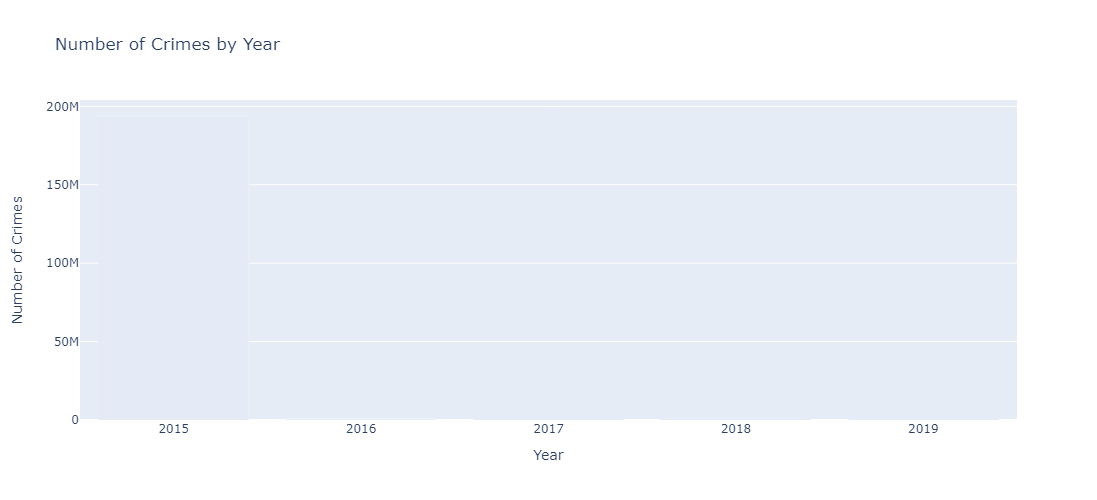

In [71]:
import plotly.express as px

fig = px.bar(
    dataFrame,
    x='Year',
    y='Year',
    title='Number of Crimes by Year'
)

# Set a more descriptive y-axis label
fig.update_layout(yaxis_title='Number of Crimes',width=800,height=500)

fig.show()

graph_json = pio.to_json(fig)

# exporting into json to display graphs in streamlit
with open("1_number_of_crimes_by_year.json", "w") as json_file:
    json_file.write(graph_json)

In [16]:
# Since we do not have crimes in starting years so we drop them 2020
# selecting the dataset which starts from 2015
dataFrame=dataFrame[dataFrame['Year']>=2015]
dataFrame=dataFrame[dataFrame['Year']<2020]
dataFrame

ID                    Date       Primary Type  \
0      10224738  09/05/2015 01:30:00 PM            BATTERY   
1      10224739  09/04/2015 11:30:00 AM              THEFT   
2      11646166  09/01/2018 12:01:00 AM              THEFT   
3      10224740  09/05/2015 12:45:00 PM          NARCOTICS   
4      10224741  09/05/2015 01:00:00 PM            ASSAULT   
...         ...                     ...                ...   
99994  11483745  07/27/2018 07:44:31 PM  WEAPONS VIOLATION   
99995  10215489  08/28/2015 11:00:00 PM              THEFT   
99996  10215490  08/28/2015 09:00:00 PM    CRIMINAL DAMAGE   
99997  10215491  08/29/2015 04:10:00 AM    CRIMINAL DAMAGE   
99998  10215493  08/29/2015 02:30:00 AM            BATTERY   

                 Location Description  Arrest  Domestic  Beat  District  Ward  \
0                           RESIDENCE   False      True   924       9.0  12.0   
1                             CTA BUS   False     False  1511      15.0  29.0   
2                           RESIDENCE   False      True   631       6.0   8.0   
3                            SIDEWALK    True     False  1412      14.0  35.0   
4                           APARTMENT   False      True  1522      15.0  28.0   
...                               ...     ...       ...   ...       ...   ...   
99994                       APARTMENT   False      True   932       9.0  16.0   
99995  PARKING LOT/GARAGE(NON.RESID.)   False     False   122       1.0   2.0   
99996                          STREET   False     False  1523      15.0  37.0   
99997                       RESIDENCE    True     False   814       8.0  23.0   
99998                        SIDEWALK   False     False  1921      19.0  47.0   

       Community Area  X Coordinate  Y Coordinate  Year   Latitude  Longitude  \
0                61.0  1.165074e+06  1.875917e+06  2015  41.815117 -87.670000   
1                25.0  1.138875e+06  1.904869e+06  2015  41.895080 -87.765400   
2                44.0  1.164595e+06  1.885793e+06  2018  41.842214 -87.671519   
3                21.0  1.152037e+06  1.920384e+06  2015  41.937406 -87.716650   
4                25.0  1.141706e+06  1.900086e+06  2015  41.881903 -87.755121   
...               ...           ...           ...   ...        ...        ...   
99994            61.0  1.164595e+06  1.885793e+06  2018  41.842214 -87.671519   
99995            32.0  1.174485e+06  1.898481e+06  2015  41.876830 -87.634805   
99996            25.0  1.139434e+06  1.903157e+06  2015  41.890372 -87.763389   
99997            56.0  1.141580e+06  1.869447e+06  2015  41.797828 -87.756340   
99998             5.0  1.159936e+06  1.923844e+06  2015  41.946741 -87.687524   

                            Location  
0      (41.815117282, -87.669999562)  
1      (41.895080471, -87.765400451)  
2      (41.883500187, -87.627876698)  
3      (41.937405765, -87.716649687)  
4      (41.881903443, -87.755121152)  
...                              ...  
99994  (41.883500187, -87.627876698)  
99995  (41.876830123, -87.634805497)  
99996  (41.890372359, -87.763389126)  
99997  (41.797827897, -87.756339623)  
99998  (41.946740626, -87.687523673)  

[98547 rows x 16 columns]

In [18]:
# # listing the crimes type wise with their counts
types=dataFrame['Primary Type'].value_counts().sort_values(ascending=False)
types

Primary Type
THEFT                                22113
BATTERY                              18043
CRIMINAL DAMAGE                      11119
NARCOTICS                             7682
OTHER OFFENSE                         6520
ASSAULT                               6229
DECEPTIVE PRACTICE                    6026
BURGLARY                              5331
ROBBERY                               3893
MOTOR VEHICLE THEFT                   3831
CRIMINAL TRESPASS                     2266
WEAPONS VIOLATION                     1308
PUBLIC PEACE VIOLATION                 842
OFFENSE INVOLVING CHILDREN             827
CRIM SEXUAL ASSAULT                    548
INTERFERENCE WITH PUBLIC OFFICER       497
PROSTITUTION                           406
SEX OFFENSE                            392
ARSON                                  184
GAMBLING                               124
LIQUOR LAW VIOLATION                   116
KIDNAPPING                              75
STALKING                                5

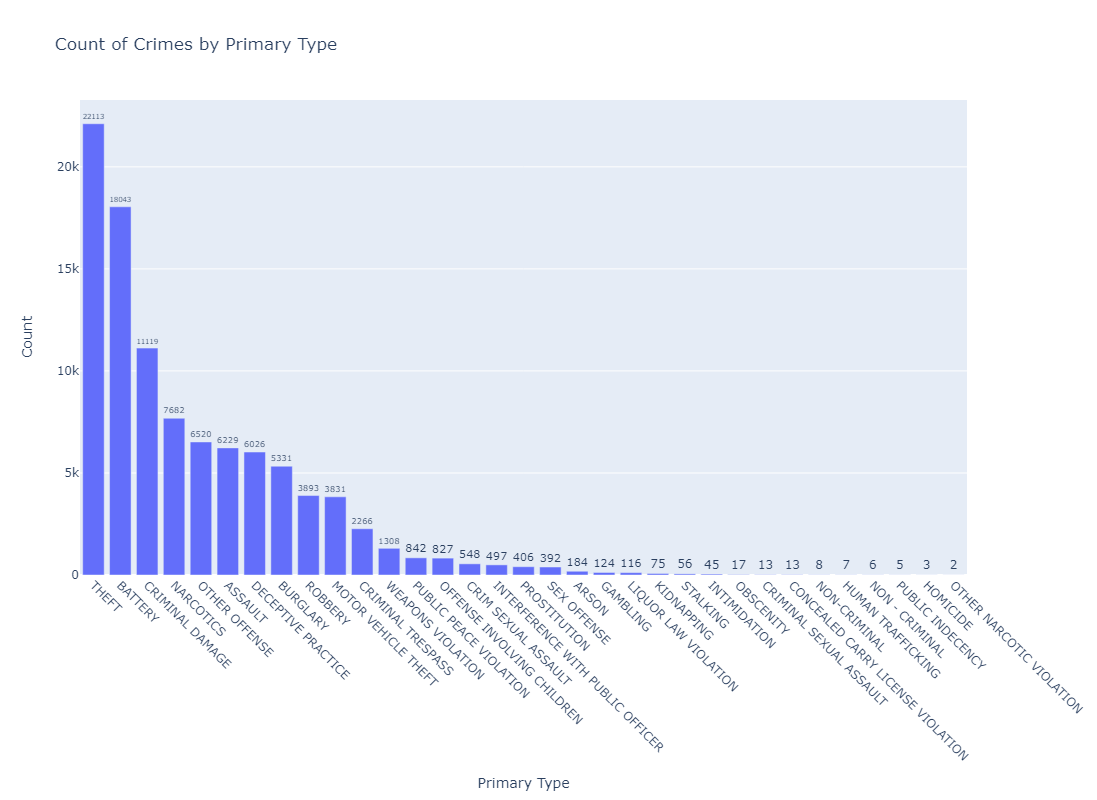

In [72]:
# plt.figure(figsize=(10,8))
# sns.countplot(data=dataFrame, y="Primary Type", order=dataFrame['Primary Type'].value_counts().index)
# plt.xticks(rotation=90)
# plt.xlabel('Count of Crimes')
# plt.show()

from plotly.graph_objs import Figure, Bar

# Assuming 'dataFrame' is a pandas DataFrame

# Create a plotly figure object
fig = Figure()

# Add bars to the figure
fig.add_trace(Bar(
    x=dataFrame['Primary Type'].value_counts().index,
    y=dataFrame['Primary Type'].value_counts().values,
    name='Count of Crimes',
    text=dataFrame['Primary Type'].value_counts().values,  # Add text labels to bars
    textposition='outside'  # Position text labels outside the bars
))

# Update x-axis labels with 90 degrees rotation
fig.update_layout(xaxis_tickangle=45)

# Update figure title and labels
fig.update_layout(
    title="Count of Crimes by Primary Type",
    xaxis_title="Primary Type",
    yaxis_title="Count",
    width=1000,  
    height=800
)

# Display the plotly figure
fig.show()

graph_json = pio.to_json(fig)

# exporting into json to display graphs in streamlit
with open("2_count_of_crimes_by_crime_type.json", "w") as json_file:
    json_file.write(graph_json)

In [20]:
fourMajorTypes=dataFrame['Primary Type'].value_counts().sort_values(ascending=False)
fourMajorTypes=fourMajorTypes[:4]
fourMajorTypes

Primary Type
THEFT              22113
BATTERY            18043
CRIMINAL DAMAGE    11119
NARCOTICS           7682
Name: count, dtype: int64

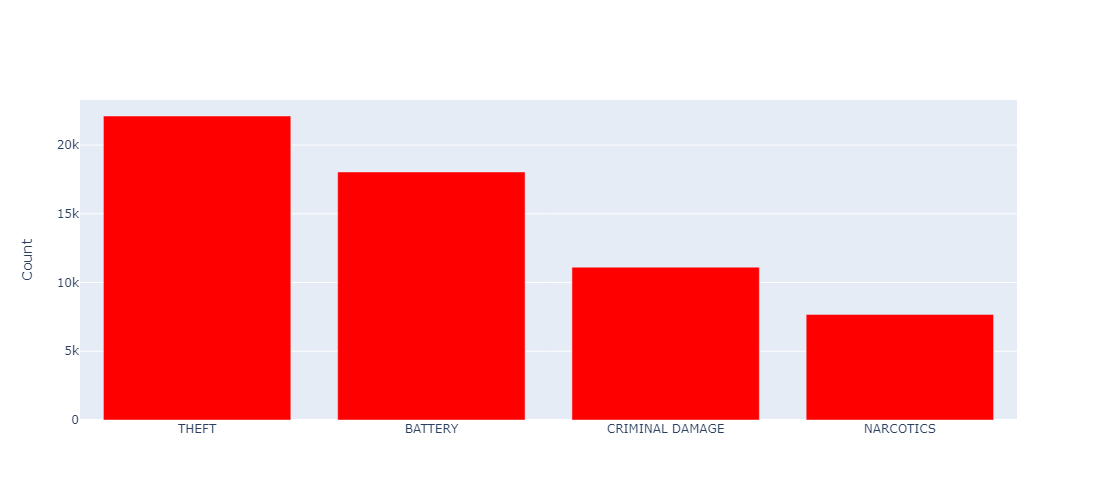

In [73]:
# fourMajorTypes.plot(kind='bar',color='red')
# plt.ylabel('Count')
# plt.show()

fig = Figure()

# Add a bar trace with red color
fig.add_trace(Bar(
    x=fourMajorTypes.index,
    y=fourMajorTypes.values,
    marker=dict(color='red'), 
    name='Top 4 Crime Types'
))

# Update y-axis label
fig.update_layout(yaxis_title="Count",width = 800,
    height = 500)

# Display the plotly figure
fig.show()

graph_json = pio.to_json(fig)

# exporting into json to display graphs in streamlit
with open("3_top_four_crime_types", "w") as json_file:
    json_file.write(graph_json)

In [22]:
# major crime time
#---> Storing Major Crimes
major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT']


# crime types according to their counts in dataframe
# 15 classes
# major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT','OTHER OFFENSE','DECEPTIVE PRACTICE','NARCOTICS','BURGLARY','MOTOR VEHICLE THEFT'
#               ,'ROBBERY','CRIMINAL TRESPASS','WEAPONS VIOLATION','OFFENSE INVOLVING CHILDREN','PUBLIC PEACE VIOLATION','CRIM SEXUAL ASSAULT']
# 8 classes
# storing major crime types according to their counts in dataframe
# major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT','OTHER OFFENSE','DECEPTIVE PRACTICE','NARCOTICS','BURGLARY']

In [23]:
# selecting the data form our dataset that belongs major crime classes
crime_df = dataFrame.loc[dataFrame['Primary Type'] .isin(major_crimes)]
crime_df

ID                    Date     Primary Type  \
0      10224738  09/05/2015 01:30:00 PM          BATTERY   
1      10224739  09/04/2015 11:30:00 AM            THEFT   
2      11646166  09/01/2018 12:01:00 AM            THEFT   
4      10224741  09/05/2015 01:00:00 PM          ASSAULT   
7      10224744  09/05/2015 01:00:00 PM            THEFT   
...         ...                     ...              ...   
99993  10215487  08/29/2015 05:05:00 AM            THEFT   
99995  10215489  08/28/2015 11:00:00 PM            THEFT   
99996  10215490  08/28/2015 09:00:00 PM  CRIMINAL DAMAGE   
99997  10215491  08/29/2015 04:10:00 AM  CRIMINAL DAMAGE   
99998  10215493  08/29/2015 02:30:00 AM          BATTERY   

                 Location Description  Arrest  Domestic  Beat  District  Ward  \
0                           RESIDENCE   False      True   924       9.0  12.0   
1                             CTA BUS   False     False  1511      15.0  29.0   
2                           RESIDENCE   False      True   631       6.0   8.0   
4                           APARTMENT   False      True  1522      15.0  28.0   
7                  GROCERY FOOD STORE    True     False  1034      10.0  25.0   
...                               ...     ...       ...   ...       ...   ...   
99993                        SIDEWALK   False     False  2213      22.0  21.0   
99995  PARKING LOT/GARAGE(NON.RESID.)   False     False   122       1.0   2.0   
99996                          STREET   False     False  1523      15.0  37.0   
99997                       RESIDENCE    True     False   814       8.0  23.0   
99998                        SIDEWALK   False     False  1921      19.0  47.0   

       Community Area  X Coordinate  Y Coordinate  Year   Latitude  Longitude  \
0                61.0  1.165074e+06  1.875917e+06  2015  41.815117 -87.670000   
1                25.0  1.138875e+06  1.904869e+06  2015  41.895080 -87.765400   
2                44.0  1.164595e+06  1.885793e+06  2018  41.842214 -87.671519   
4                25.0  1.141706e+06  1.900086e+06  2015  41.881903 -87.755121   
7                31.0  1.159734e+06  1.889313e+06  2015  41.851989 -87.689219   
...               ...           ...           ...   ...        ...        ...   
99993            73.0  1.169808e+06  1.840999e+06  2015  41.719196 -87.653647   
99995            32.0  1.174485e+06  1.898481e+06  2015  41.876830 -87.634805   
99996            25.0  1.139434e+06  1.903157e+06  2015  41.890372 -87.763389   
99997            56.0  1.141580e+06  1.869447e+06  2015  41.797828 -87.756340   
99998             5.0  1.159936e+06  1.923844e+06  2015  41.946741 -87.687524   

                            Location  
0      (41.815117282, -87.669999562)  
1      (41.895080471, -87.765400451)  
2      (41.883500187, -87.627876698)  
4      (41.881903443, -87.755121152)  
7      (41.851988885, -87.689219118)  
...                              ...  
99993  (41.719196291, -87.653646697)  
99995  (41.876830123, -87.634805497)  
99996  (41.890372359, -87.763389126)  
99997  (41.797827897, -87.756339623)  
99998  (41.946740626, -87.687523673)  

[57504 rows x 16 columns]

In [24]:
loc=crime_df['Location Description'].value_counts().sort_values(ascending=False)
loc=loc[:20]
loc

Location Description
STREET                            13036
APARTMENT                          7937
RESIDENCE                          7651
SIDEWALK                           5470
OTHER                              2221
PARKING LOT/GARAGE(NON.RESID.)     1895
RESIDENTIAL YARD (FRONT/BACK)      1602
SMALL RETAIL STORE                 1572
RESIDENCE PORCH/HALLWAY            1335
RESTAURANT                         1316
DEPARTMENT STORE                   1284
VEHICLE NON-COMMERCIAL              988
ALLEY                               899
GROCERY FOOD STORE                  861
SCHOOL, PUBLIC, BUILDING            814
RESIDENCE-GARAGE                    773
PARK PROPERTY                       664
GAS STATION                         575
BAR OR TAVERN                       516
CTA TRAIN                           384
Name: count, dtype: int64

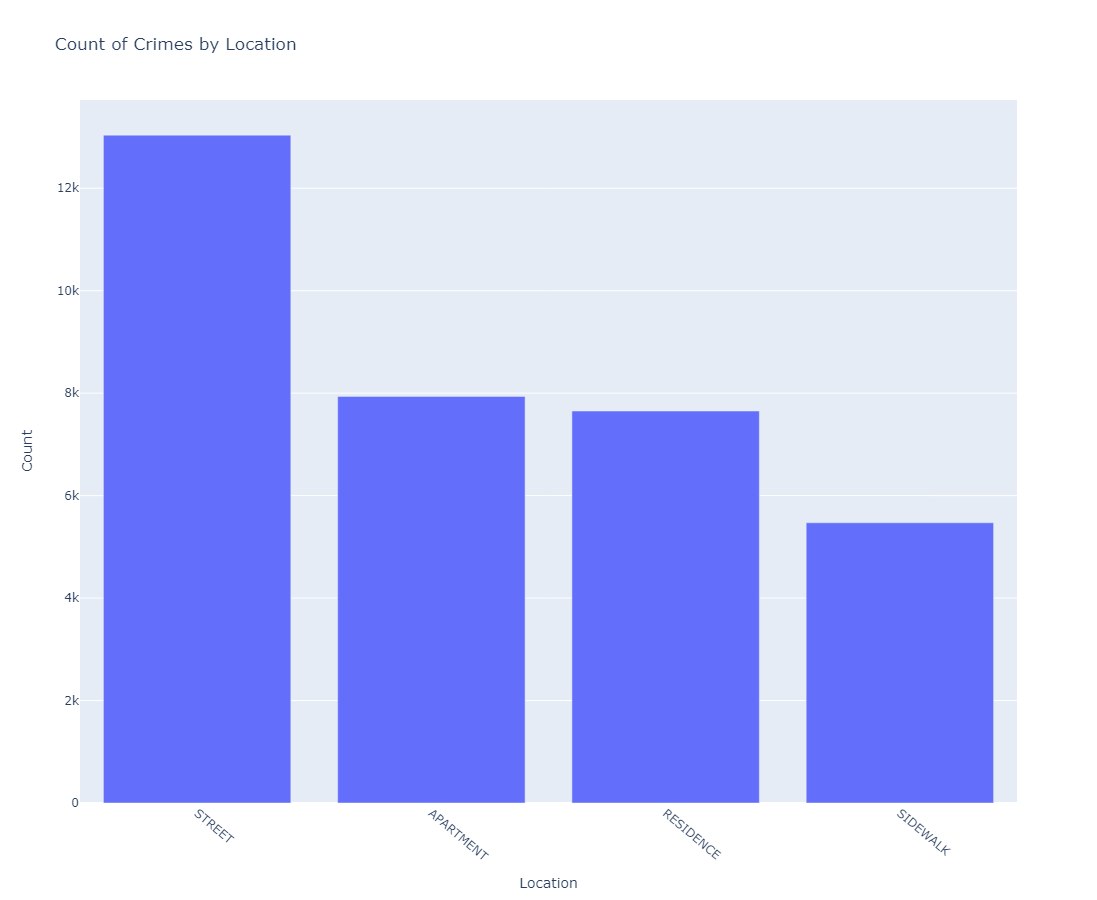

In [79]:
# plt.figure(figsize=(12,8))
# sns.countplot(data=crime_df, x="Location Description", order=loc.index)
# plt.xticks(rotation='vertical')
# plt.ylabel('Count of Crimes')
# plt.show()

from plotly.graph_objs import Figure, Bar

# Assuming 'crime_df' is a pandas DataFrame
# Assuming 'loc' is a pandas Series with location labels

# Create a plotly figure object
fig = Figure() # Set figure size

# Add bars to the figure with vertical labels
fig.add_trace(Bar(
    x=loc.index,
    y=crime_df['Location Description'].value_counts(),
    name='Count of Crimes'
))

# Rotate x-axis labels vertically
fig.update_layout(xaxis_tickangle=40)

# Update figure labels
fig.update_layout(
    title="Count of Crimes by Location",
    xaxis_title="Location",
    yaxis_title="Count",
    width=800,
    height=900
)

# Display the plotly figure
fig.show()

graph_json = pio.to_json(fig)

# exporting into json to display graphs in streamlit
with open("4_count_of_top_four_crimes_by_location.json", "w") as json_file:
    json_file.write(graph_json)

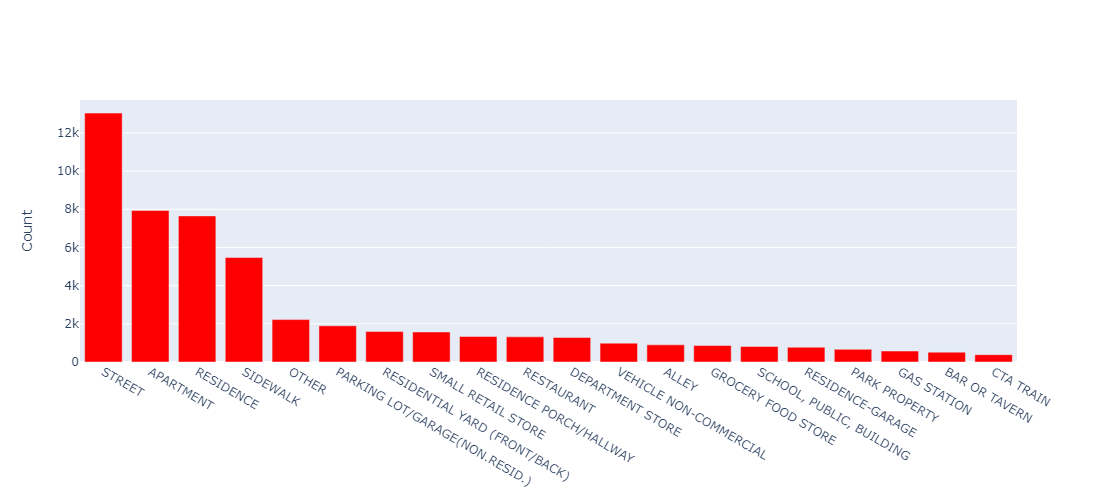

In [75]:
# plt.figure(figsize=(12,8))
# loc.plot(kind='bar',color='red')
# plt.ylabel('Count')
# plt.show()

# Create a plotly figure object
fig = Figure()  # Set figure size

# Add a bar trace with red color
fig.add_trace(Bar(
    x=loc.index,  # Set x-axis data
    y=loc.values,   # Set y-axis data (counts)
    marker=dict(color='red'),  # Set bar color to red
    name='Count of Crimes'      # Set bar series name
))

# Update y-axis label
fig.update_layout(yaxis_title="Count", width=700,height=500)

# Display the plotly figure
fig.show()

graph_json = pio.to_json(fig)

# exporting into json to display graphs in streamlit
with open("5_count_of_all_crimes_by_location.json", "w") as json_file:
    json_file.write(graph_json)

In [27]:
# storing four major 4 locations
major_loc = ['STREET','RESIDENCE', 'APARTMENT','SIDEWALK']

In [28]:
# selecting the data form our dataset that belongs major locations
crime_df = crime_df.loc[crime_df['Location Description'] .isin(major_loc)]
crime_df

ID                    Date     Primary Type Location Description  \
0      10224738  09/05/2015 01:30:00 PM          BATTERY            RESIDENCE   
2      11646166  09/01/2018 12:01:00 AM            THEFT            RESIDENCE   
4      10224741  09/05/2015 01:00:00 PM          ASSAULT            APARTMENT   
13     10224751  09/05/2015 12:50:00 PM          BATTERY               STREET   
14     10224752  09/03/2015 01:00:00 PM            THEFT               STREET   
...         ...                     ...              ...                  ...   
99992  10215486  08/29/2015 05:32:00 AM          BATTERY            APARTMENT   
99993  10215487  08/29/2015 05:05:00 AM            THEFT             SIDEWALK   
99996  10215490  08/28/2015 09:00:00 PM  CRIMINAL DAMAGE               STREET   
99997  10215491  08/29/2015 04:10:00 AM  CRIMINAL DAMAGE            RESIDENCE   
99998  10215493  08/29/2015 02:30:00 AM          BATTERY             SIDEWALK   

       Arrest  Domestic  Beat  District  Ward  Community Area  X Coordinate  \
0       False      True   924       9.0  12.0            61.0  1.165074e+06   
2       False      True   631       6.0   8.0            44.0  1.164595e+06   
4       False      True  1522      15.0  28.0            25.0  1.141706e+06   
13      False      True   222       2.0   4.0            39.0  1.185907e+06   
14      False     False  1424      14.0   1.0            24.0  1.162574e+06   
...       ...       ...   ...       ...   ...             ...           ...   
99992   False      True  1023      10.0  28.0            30.0  1.158698e+06   
99993   False     False  2213      22.0  21.0            73.0  1.169808e+06   
99996   False     False  1523      15.0  37.0            25.0  1.139434e+06   
99997    True     False   814       8.0  23.0            56.0  1.141580e+06   
99998   False     False  1921      19.0  47.0             5.0  1.159936e+06   

       Y Coordinate  Year   Latitude  Longitude                       Location  
0      1.875917e+06  2015  41.815117 -87.670000  (41.815117282, -87.669999562)  
2      1.885793e+06  2018  41.842214 -87.671519  (41.883500187, -87.627876698)  
4      1.900086e+06  2015  41.881903 -87.755121  (41.881903443, -87.755121152)  
13     1.874105e+06  2015  41.809678 -87.593639  (41.809678314, -87.593638934)  
14     1.909428e+06  2015  41.907127 -87.678232  (41.907127255, -87.678232016)  
...             ...   ...        ...        ...                            ...  
99992  1.889516e+06  2015  41.852567 -87.693016    (41.8525672, -87.693015971)  
99993  1.840999e+06  2015  41.719196 -87.653647  (41.719196291, -87.653646697)  
99996  1.903157e+06  2015  41.890372 -87.763389  (41.890372359, -87.763389126)  
99997  1.869447e+06  2015  41.797828 -87.756340  (41.797827897, -87.756339623)  
99998  1.923844e+06  2015  41.946741 -87.687524  (41.946740626, -87.687523673)  

[34094 rows x 16 columns]

In [29]:
graphDF=crime_df.copy()
graphDF

ID                    Date     Primary Type Location Description  \
0      10224738  09/05/2015 01:30:00 PM          BATTERY            RESIDENCE   
2      11646166  09/01/2018 12:01:00 AM            THEFT            RESIDENCE   
4      10224741  09/05/2015 01:00:00 PM          ASSAULT            APARTMENT   
13     10224751  09/05/2015 12:50:00 PM          BATTERY               STREET   
14     10224752  09/03/2015 01:00:00 PM            THEFT               STREET   
...         ...                     ...              ...                  ...   
99992  10215486  08/29/2015 05:32:00 AM          BATTERY            APARTMENT   
99993  10215487  08/29/2015 05:05:00 AM            THEFT             SIDEWALK   
99996  10215490  08/28/2015 09:00:00 PM  CRIMINAL DAMAGE               STREET   
99997  10215491  08/29/2015 04:10:00 AM  CRIMINAL DAMAGE            RESIDENCE   
99998  10215493  08/29/2015 02:30:00 AM          BATTERY             SIDEWALK   

       Arrest  Domestic  Beat  District  Ward  Community Area  X Coordinate  \
0       False      True   924       9.0  12.0            61.0  1.165074e+06   
2       False      True   631       6.0   8.0            44.0  1.164595e+06   
4       False      True  1522      15.0  28.0            25.0  1.141706e+06   
13      False      True   222       2.0   4.0            39.0  1.185907e+06   
14      False     False  1424      14.0   1.0            24.0  1.162574e+06   
...       ...       ...   ...       ...   ...             ...           ...   
99992   False      True  1023      10.0  28.0            30.0  1.158698e+06   
99993   False     False  2213      22.0  21.0            73.0  1.169808e+06   
99996   False     False  1523      15.0  37.0            25.0  1.139434e+06   
99997    True     False   814       8.0  23.0            56.0  1.141580e+06   
99998   False     False  1921      19.0  47.0             5.0  1.159936e+06   

       Y Coordinate  Year   Latitude  Longitude                       Location  
0      1.875917e+06  2015  41.815117 -87.670000  (41.815117282, -87.669999562)  
2      1.885793e+06  2018  41.842214 -87.671519  (41.883500187, -87.627876698)  
4      1.900086e+06  2015  41.881903 -87.755121  (41.881903443, -87.755121152)  
13     1.874105e+06  2015  41.809678 -87.593639  (41.809678314, -87.593638934)  
14     1.909428e+06  2015  41.907127 -87.678232  (41.907127255, -87.678232016)  
...             ...   ...        ...        ...                            ...  
99992  1.889516e+06  2015  41.852567 -87.693016    (41.8525672, -87.693015971)  
99993  1.840999e+06  2015  41.719196 -87.653647  (41.719196291, -87.653646697)  
99996  1.903157e+06  2015  41.890372 -87.763389  (41.890372359, -87.763389126)  
99997  1.869447e+06  2015  41.797828 -87.756340  (41.797827897, -87.756339623)  
99998  1.923844e+06  2015  41.946741 -87.687524  (41.946740626, -87.687523673)  

[34094 rows x 16 columns]

In [30]:
graphDF['Date'] = pd.to_datetime(graphDF['Date'])
graphDF

C:\Users\Darsi Gangothri\AppData\Local\Temp\ipykernel_2276\30015118.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



ID                Date     Primary Type Location Description  \
0      10224738 2015-09-05 13:30:00          BATTERY            RESIDENCE   
2      11646166 2018-09-01 00:01:00            THEFT            RESIDENCE   
4      10224741 2015-09-05 13:00:00          ASSAULT            APARTMENT   
13     10224751 2015-09-05 12:50:00          BATTERY               STREET   
14     10224752 2015-09-03 13:00:00            THEFT               STREET   
...         ...                 ...              ...                  ...   
99992  10215486 2015-08-29 05:32:00          BATTERY            APARTMENT   
99993  10215487 2015-08-29 05:05:00            THEFT             SIDEWALK   
99996  10215490 2015-08-28 21:00:00  CRIMINAL DAMAGE               STREET   
99997  10215491 2015-08-29 04:10:00  CRIMINAL DAMAGE            RESIDENCE   
99998  10215493 2015-08-29 02:30:00          BATTERY             SIDEWALK   

       Arrest  Domestic  Beat  District  Ward  Community Area  X Coordinate  \
0       False      True   924       9.0  12.0            61.0  1.165074e+06   
2       False      True   631       6.0   8.0            44.0  1.164595e+06   
4       False      True  1522      15.0  28.0            25.0  1.141706e+06   
13      False      True   222       2.0   4.0            39.0  1.185907e+06   
14      False     False  1424      14.0   1.0            24.0  1.162574e+06   
...       ...       ...   ...       ...   ...             ...           ...   
99992   False      True  1023      10.0  28.0            30.0  1.158698e+06   
99993   False     False  2213      22.0  21.0            73.0  1.169808e+06   
99996   False     False  1523      15.0  37.0            25.0  1.139434e+06   
99997    True     False   814       8.0  23.0            56.0  1.141580e+06   
99998   False     False  1921      19.0  47.0             5.0  1.159936e+06   

       Y Coordinate  Year   Latitude  Longitude                       Location  
0      1.875917e+06  2015  41.815117 -87.670000  (41.815117282, -87.669999562)  
2      1.885793e+06  2018  41.842214 -87.671519  (41.883500187, -87.627876698)  
4      1.900086e+06  2015  41.881903 -87.755121  (41.881903443, -87.755121152)  
13     1.874105e+06  2015  41.809678 -87.593639  (41.809678314, -87.593638934)  
14     1.909428e+06  2015  41.907127 -87.678232  (41.907127255, -87.678232016)  
...             ...   ...        ...        ...                            ...  
99992  1.889516e+06  2015  41.852567 -87.693016    (41.8525672, -87.693015971)  
99993  1.840999e+06  2015  41.719196 -87.653647  (41.719196291, -87.653646697)  
99996  1.903157e+06  2015  41.890372 -87.763389  (41.890372359, -87.763389126)  
99997  1.869447e+06  2015  41.797828 -87.756340  (41.797827897, -87.756339623)  
99998  1.923844e+06  2015  41.946741 -87.687524  (41.946740626, -87.687523673)  

[34094 rows x 16 columns]

In [31]:
graphDF['Date'] = pd.to_datetime(graphDF['Date'],format='%m/%d/%Y %I:%M:%S %p')
graphDF['Date']

0       2015-09-05 13:30:00
2       2018-09-01 00:01:00
4       2015-09-05 13:00:00
13      2015-09-05 12:50:00
14      2015-09-03 13:00:00
                ...        
99992   2015-08-29 05:32:00
99993   2015-08-29 05:05:00
99996   2015-08-28 21:00:00
99997   2015-08-29 04:10:00
99998   2015-08-29 02:30:00
Name: Date, Length: 34094, dtype: datetime64[ns]

In [32]:
import calendar
graphDF['Month']=(graphDF['Date'].dt.month).apply(lambda x: calendar.month_abbr[x])
graphDF.head(4)

ID                Date Primary Type Location Description  Arrest  \
0   10224738 2015-09-05 13:30:00      BATTERY            RESIDENCE   False   
2   11646166 2018-09-01 00:01:00        THEFT            RESIDENCE   False   
4   10224741 2015-09-05 13:00:00      ASSAULT            APARTMENT   False   
13  10224751 2015-09-05 12:50:00      BATTERY               STREET   False   

    Domestic  Beat  District  Ward  Community Area  X Coordinate  \
0       True   924       9.0  12.0            61.0  1.165074e+06   
2       True   631       6.0   8.0            44.0  1.164595e+06   
4       True  1522      15.0  28.0            25.0  1.141706e+06   
13      True   222       2.0   4.0            39.0  1.185907e+06   

    Y Coordinate  Year   Latitude  Longitude                       Location  \
0   1.875917e+06  2015  41.815117 -87.670000  (41.815117282, -87.669999562)   
2   1.885793e+06  2018  41.842214 -87.671519  (41.883500187, -87.627876698)   
4   1.900086e+06  2015  41.881903 -87.755121  (41.881903443, -87.755121152)   
13  1.874105e+06  2015  41.809678 -87.593639  (41.809678314, -87.593638934)   

   Month  
0    Sep  
2    Sep  
4    Sep  
13   Sep

In [33]:
# storing the categories of months
graphDF['Month'] = pd.Categorical(graphDF['Month'] , categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)

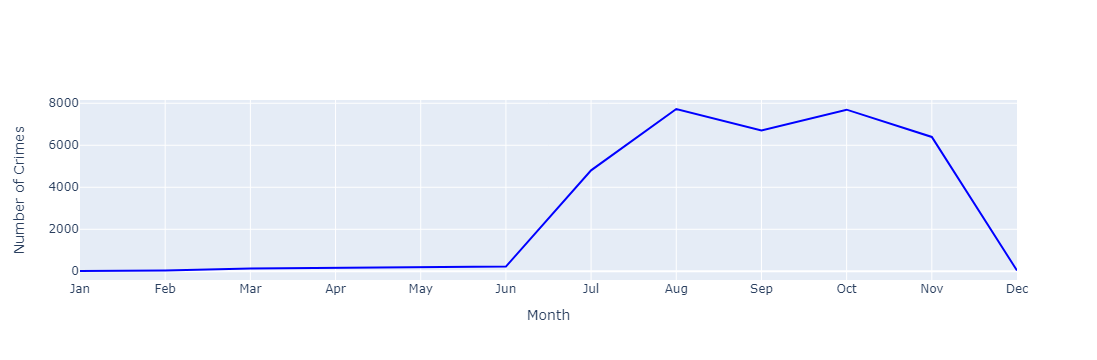

In [76]:
import numpy as np
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# graphDF.groupby('Month')['ID'].count().plot(marker='o')
# plt.xticks(np.arange(12),months)
# plt.ylabel('No of Crimes')
# plt.show()

from plotly.graph_objs import Figure, Scatter, Line
month_counts = graphDF.groupby('Month')['ID'].count()

# Create a plotly figure object
fig = Figure()

# Add scatter trace with circular markers
fig.add_trace(Scatter(
    x=month_counts.index,
    y=month_counts.values,
    marker=dict(
        size=10,
        color='blue',
        symbol='circle'
    ),
    mode='lines'
))
# Set custom x-axis labels
fig.update_layout(
    xaxis_title="Month",
    xaxis_tickvals=month_counts.index.tolist(),
    xaxis_ticktext=months
)

# Update y-axis label
fig.update_layout(yaxis_title="Number of Crimes")

# Display the plotly figure
fig.show()

graph_json = pio.to_json(fig)

# exporting into json to display graphs in streamlit
with open("6_number_of_crimes_by_month.json", "w") as json_file:
    json_file.write(graph_json)

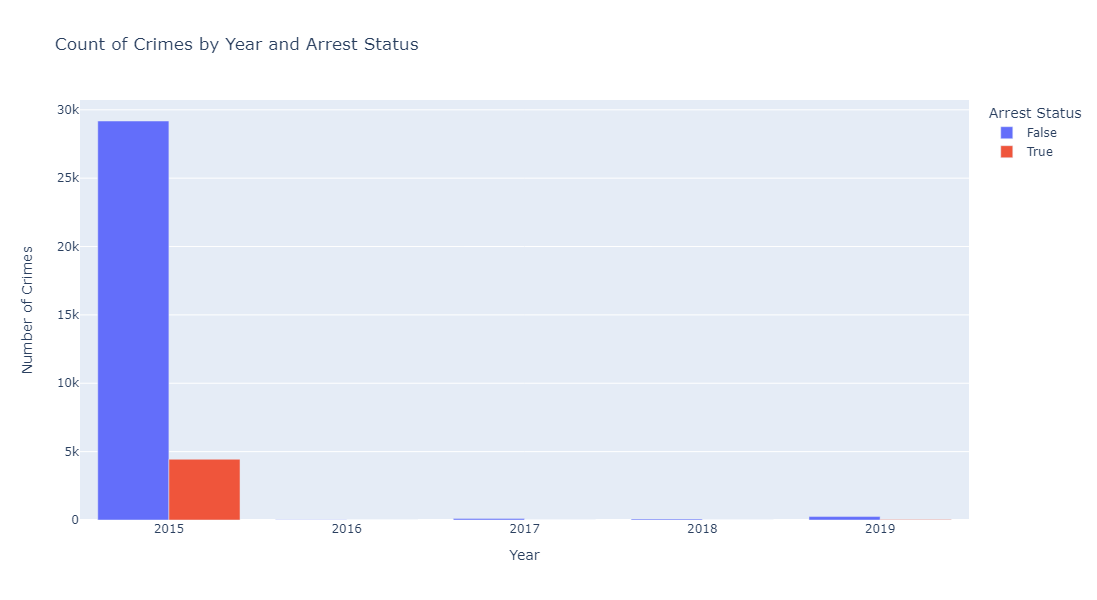

In [77]:
# graphDF.groupby(['Year','Arrest'])['ID'].count().unstack().plot(kind='bar')
# plt.ylabel('No of Crimes')
# plt.show()

from plotly.graph_objs import Figure, Bar

# Group data by year and arrest, then count crimes and unstack
crime_counts = (
    graphDF.groupby(['Year', 'Arrest'])['ID']
    .count()
    .unstack(fill_value=0)  # Fill missing values with 0
)

# Create a plotly figure object
fig = Figure()

# Add stacked bar traces
for col in crime_counts.columns:
    fig.add_trace(Bar(
        x=crime_counts.index,
        y=crime_counts[col],
        name=col
    ))

# Update layout elements
fig.update_layout(
    title="Count of Crimes by Year and Arrest Status",
    xaxis_title="Year",
    yaxis_title="Number of Crimes",
    legend_title="Arrest Status",  # Set legend title,
    height=600
)

# Display the plotly figure
fig.show()

graph_json = pio.to_json(fig)

# exporting into json to display graphs in streamlit
with open("7_count_of_crimes_by_year_and_arrest_status.json", "w") as json_file:
    json_file.write(graph_json)

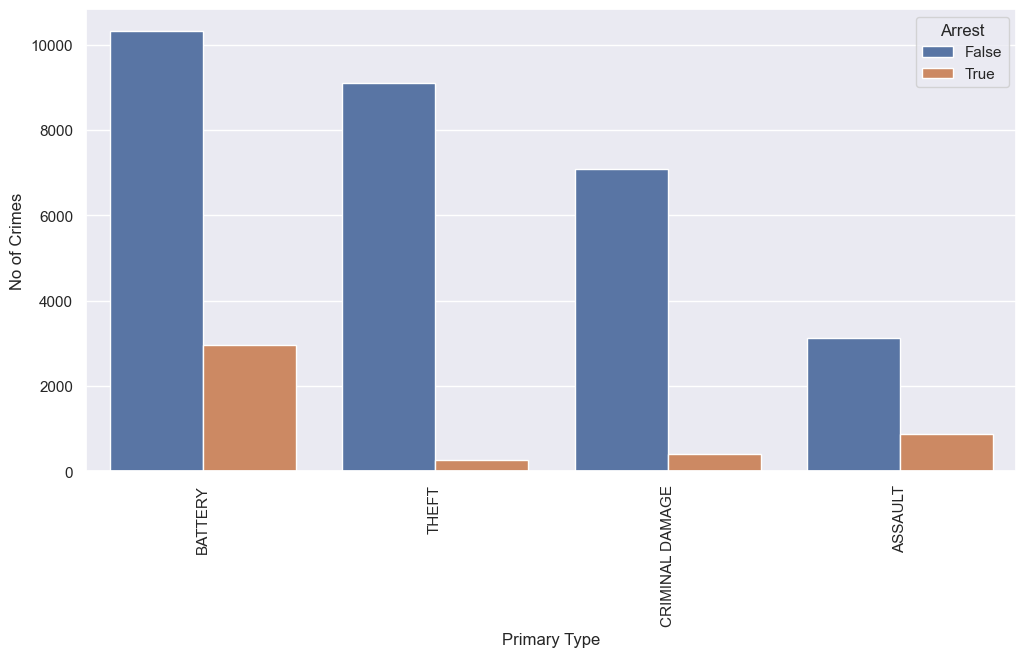

In [36]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Primary Type',hue='Arrest',data=graphDF,order=graphDF['Primary Type'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('No of Crimes')
plt.show()

In [37]:
temp=graphDF.copy()
temp

ID                Date     Primary Type Location Description  \
0      10224738 2015-09-05 13:30:00          BATTERY            RESIDENCE   
2      11646166 2018-09-01 00:01:00            THEFT            RESIDENCE   
4      10224741 2015-09-05 13:00:00          ASSAULT            APARTMENT   
13     10224751 2015-09-05 12:50:00          BATTERY               STREET   
14     10224752 2015-09-03 13:00:00            THEFT               STREET   
...         ...                 ...              ...                  ...   
99992  10215486 2015-08-29 05:32:00          BATTERY            APARTMENT   
99993  10215487 2015-08-29 05:05:00            THEFT             SIDEWALK   
99996  10215490 2015-08-28 21:00:00  CRIMINAL DAMAGE               STREET   
99997  10215491 2015-08-29 04:10:00  CRIMINAL DAMAGE            RESIDENCE   
99998  10215493 2015-08-29 02:30:00          BATTERY             SIDEWALK   

       Arrest  Domestic  Beat  District  Ward  Community Area  X Coordinate  \
0       False      True   924       9.0  12.0            61.0  1.165074e+06   
2       False      True   631       6.0   8.0            44.0  1.164595e+06   
4       False      True  1522      15.0  28.0            25.0  1.141706e+06   
13      False      True   222       2.0   4.0            39.0  1.185907e+06   
14      False     False  1424      14.0   1.0            24.0  1.162574e+06   
...       ...       ...   ...       ...   ...             ...           ...   
99992   False      True  1023      10.0  28.0            30.0  1.158698e+06   
99993   False     False  2213      22.0  21.0            73.0  1.169808e+06   
99996   False     False  1523      15.0  37.0            25.0  1.139434e+06   
99997    True     False   814       8.0  23.0            56.0  1.141580e+06   
99998   False     False  1921      19.0  47.0             5.0  1.159936e+06   

       Y Coordinate  Year   Latitude  Longitude  \
0      1.875917e+06  2015  41.815117 -87.670000   
2      1.885793e+06  2018  41.842214 -87.671519   
4      1.900086e+06  2015  41.881903 -87.755121   
13     1.874105e+06  2015  41.809678 -87.593639   
14     1.909428e+06  2015  41.907127 -87.678232   
...             ...   ...        ...        ...   
99992  1.889516e+06  2015  41.852567 -87.693016   
99993  1.840999e+06  2015  41.719196 -87.653647   
99996  1.903157e+06  2015  41.890372 -87.763389   
99997  1.869447e+06  2015  41.797828 -87.756340   
99998  1.923844e+06  2015  41.946741 -87.687524   

                            Location Month  
0      (41.815117282, -87.669999562)   Sep  
2      (41.883500187, -87.627876698)   Sep  
4      (41.881903443, -87.755121152)   Sep  
13     (41.809678314, -87.593638934)   Sep  
14     (41.907127255, -87.678232016)   Sep  
...                              ...   ...  
99992    (41.8525672, -87.693015971)   Aug  
99993  (41.719196291, -87.653646697)   Aug  
99996  (41.890372359, -87.763389126)   Aug  
99997  (41.797827897, -87.756339623)   Aug  
99998  (41.946740626, -87.687523673)   Aug  

[34094 rows x 17 columns]

In [38]:
def crime_type(t):
    if t =='THEFT': return '0'
    elif t =='BATTERY': return '1'
    elif t =='CRIMINAL DAMAGE': return '2'
    elif t == 'ASSAULT': return '3'
    else: return '-1'

In [39]:
# cp_crime = crime_df.copy()
temp['crimeType'] = temp['Primary Type'].map(crime_type)
temp=temp.drop(columns='Primary Type')
temp

ID                Date Location Description  Arrest  Domestic  \
0      10224738 2015-09-05 13:30:00            RESIDENCE   False      True   
2      11646166 2018-09-01 00:01:00            RESIDENCE   False      True   
4      10224741 2015-09-05 13:00:00            APARTMENT   False      True   
13     10224751 2015-09-05 12:50:00               STREET   False      True   
14     10224752 2015-09-03 13:00:00               STREET   False     False   
...         ...                 ...                  ...     ...       ...   
99992  10215486 2015-08-29 05:32:00            APARTMENT   False      True   
99993  10215487 2015-08-29 05:05:00             SIDEWALK   False     False   
99996  10215490 2015-08-28 21:00:00               STREET   False     False   
99997  10215491 2015-08-29 04:10:00            RESIDENCE    True     False   
99998  10215493 2015-08-29 02:30:00             SIDEWALK   False     False   

       Beat  District  Ward  Community Area  X Coordinate  Y Coordinate  Year  \
0       924       9.0  12.0            61.0  1.165074e+06  1.875917e+06  2015   
2       631       6.0   8.0            44.0  1.164595e+06  1.885793e+06  2018   
4      1522      15.0  28.0            25.0  1.141706e+06  1.900086e+06  2015   
13      222       2.0   4.0            39.0  1.185907e+06  1.874105e+06  2015   
14     1424      14.0   1.0            24.0  1.162574e+06  1.909428e+06  2015   
...     ...       ...   ...             ...           ...           ...   ...   
99992  1023      10.0  28.0            30.0  1.158698e+06  1.889516e+06  2015   
99993  2213      22.0  21.0            73.0  1.169808e+06  1.840999e+06  2015   
99996  1523      15.0  37.0            25.0  1.139434e+06  1.903157e+06  2015   
99997   814       8.0  23.0            56.0  1.141580e+06  1.869447e+06  2015   
99998  1921      19.0  47.0             5.0  1.159936e+06  1.923844e+06  2015   

        Latitude  Longitude                       Location Month crimeType  
0      41.815117 -87.670000  (41.815117282, -87.669999562)   Sep         1  
2      41.842214 -87.671519  (41.883500187, -87.627876698)   Sep         0  
4      41.881903 -87.755121  (41.881903443, -87.755121152)   Sep         3  
13     41.809678 -87.593639  (41.809678314, -87.593638934)   Sep         1  
14     41.907127 -87.678232  (41.907127255, -87.678232016)   Sep         0  
...          ...        ...                            ...   ...       ...  
99992  41.852567 -87.693016    (41.8525672, -87.693015971)   Aug         1  
99993  41.719196 -87.653647  (41.719196291, -87.653646697)   Aug         0  
99996  41.890372 -87.763389  (41.890372359, -87.763389126)   Aug         2  
99997  41.797828 -87.756340  (41.797827897, -87.756339623)   Aug         2  
99998  41.946741 -87.687524  (41.946740626, -87.687523673)   Aug         1  

[34094 rows x 17 columns]

In [40]:
# temp.dropna()
temp.dropna(inplace=True)
temp

ID                Date Location Description  Arrest  Domestic  \
0      10224738 2015-09-05 13:30:00            RESIDENCE   False      True   
2      11646166 2018-09-01 00:01:00            RESIDENCE   False      True   
4      10224741 2015-09-05 13:00:00            APARTMENT   False      True   
13     10224751 2015-09-05 12:50:00               STREET   False      True   
14     10224752 2015-09-03 13:00:00               STREET   False     False   
...         ...                 ...                  ...     ...       ...   
99992  10215486 2015-08-29 05:32:00            APARTMENT   False      True   
99993  10215487 2015-08-29 05:05:00             SIDEWALK   False     False   
99996  10215490 2015-08-28 21:00:00               STREET   False     False   
99997  10215491 2015-08-29 04:10:00            RESIDENCE    True     False   
99998  10215493 2015-08-29 02:30:00             SIDEWALK   False     False   

       Beat  District  Ward  Community Area  X Coordinate  Y Coordinate  Year  \
0       924       9.0  12.0            61.0  1.165074e+06  1.875917e+06  2015   
2       631       6.0   8.0            44.0  1.164595e+06  1.885793e+06  2018   
4      1522      15.0  28.0            25.0  1.141706e+06  1.900086e+06  2015   
13      222       2.0   4.0            39.0  1.185907e+06  1.874105e+06  2015   
14     1424      14.0   1.0            24.0  1.162574e+06  1.909428e+06  2015   
...     ...       ...   ...             ...           ...           ...   ...   
99992  1023      10.0  28.0            30.0  1.158698e+06  1.889516e+06  2015   
99993  2213      22.0  21.0            73.0  1.169808e+06  1.840999e+06  2015   
99996  1523      15.0  37.0            25.0  1.139434e+06  1.903157e+06  2015   
99997   814       8.0  23.0            56.0  1.141580e+06  1.869447e+06  2015   
99998  1921      19.0  47.0             5.0  1.159936e+06  1.923844e+06  2015   

        Latitude  Longitude                       Location Month crimeType  
0      41.815117 -87.670000  (41.815117282, -87.669999562)   Sep         1  
2      41.842214 -87.671519  (41.883500187, -87.627876698)   Sep         0  
4      41.881903 -87.755121  (41.881903443, -87.755121152)   Sep         3  
13     41.809678 -87.593639  (41.809678314, -87.593638934)   Sep         1  
14     41.907127 -87.678232  (41.907127255, -87.678232016)   Sep         0  
...          ...        ...                            ...   ...       ...  
99992  41.852567 -87.693016    (41.8525672, -87.693015971)   Aug         1  
99993  41.719196 -87.653647  (41.719196291, -87.653646697)   Aug         0  
99996  41.890372 -87.763389  (41.890372359, -87.763389126)   Aug         2  
99997  41.797828 -87.756340  (41.797827897, -87.756339623)   Aug         2  
99998  41.946741 -87.687524  (41.946740626, -87.687523673)   Aug         1  

[34094 rows x 17 columns]

In [41]:
# count of null values
temp.isna().any(axis=1).sum()

0

In [42]:
# values according to their class count
count=temp['crimeType'].value_counts().sort_values(ascending=False)
count

crimeType
1    13261
0     9369
2     7480
3     3984
Name: count, dtype: int64

In [43]:
# getting the portion of our data set for random data selection
nrows= temp.shape[0]
portion=math.floor(nrows/3)
portion

11364

In [44]:
first=temp.iloc[0:portion,:]
first.shape

(11364, 17)

In [45]:
nextp=portion+portion+1
scnd=temp.iloc[(portion+1):nextp,:]
scnd.shape

(11364, 17)

In [46]:
finalp=nextp+portion+1
third=temp.iloc[(nextp+1):finalp,:]
third.shape

(11364, 17)

In [47]:
# picking random 5k enteries from the first part
index=np.random.choice(portion,replace=False,size = 10000)
df_frst=first.iloc[index]
df_frst.shape

(10000, 17)

In [48]:
# picking random 5k enteries from the second half

index=np.random.choice(portion,replace=False,size = 10000)
df_scnd=scnd.iloc[index]
df_scnd

ID                Date Location Description  Arrest  Domestic  \
65335  10156374 2015-07-18 00:54:00               STREET    True     False   
38391  10287682 2015-10-25 10:25:00            APARTMENT   False      True   
63632  10153038 2015-07-15 08:30:00            RESIDENCE   False     False   
45150  10299185 2015-11-03 10:00:00               STREET   False     False   
34058  11859509 2019-10-13 09:30:00               STREET   False      True   
...         ...                 ...                  ...     ...       ...   
51804  10310388 2015-11-12 18:00:00             SIDEWALK   False     False   
40217  10291097 2015-10-27 20:19:00            APARTMENT   False      True   
61098  10325619 2015-11-26 23:36:00            APARTMENT    True      True   
42474  10295403 2015-10-31 00:15:00            APARTMENT   False      True   
40923  10292578 2015-10-25 19:30:00            RESIDENCE   False      True   

       Beat  District  Ward  Community Area  X Coordinate  Y Coordinate  Year  \
65335   634       6.0  21.0            49.0     1176226.0     1843107.0  2015   
38391   711       7.0  20.0            68.0     1174430.0     1863494.0  2015   
63632   414       4.0   8.0            43.0     1189228.0     1853420.0  2015   
45150   725       7.0  17.0            67.0     1167461.0     1861351.0  2015   
34058   735       7.0  17.0            67.0     1164293.0     1856068.0  2019   
...     ...       ...   ...             ...           ...           ...   ...   
51804  1224      12.0  27.0            28.0     1169999.0     1900722.0  2015   
40217  1513      15.0  29.0            25.0     1137198.0     1895243.0  2015   
61098  2413      24.0  50.0             2.0     1159187.0     1941389.0  2015   
42474  1225      12.0   2.0            28.0     1160855.0     1898111.0  2015   
40923  2534      25.0  37.0            23.0     1148793.0     1909098.0  2015   

        Latitude  Longitude                       Location Month crimeType  
65335  41.724839 -87.630077   (41.72483948, -87.630076593)   Jul         3  
38391  41.780824 -87.636050  (41.780823998, -87.636050098)   Oct         1  
63632  41.752838 -87.582121  (41.752838005, -87.582121042)   Jul         2  
45150  41.775096 -87.661661  (41.775095569, -87.661661147)   Nov         0  
34058  41.760666 -87.673423  (41.760665603, -87.673423233)   Oct         2  
...          ...        ...                            ...   ...       ...  
51804  41.883079 -87.651211  (41.883078591, -87.651211195)   Nov         1  
40217  41.868696 -87.771791  (41.868695744, -87.771791063)   Oct         1  
61098  41.994900 -87.689792  (41.994900419, -87.689792348)   Nov         1  
42474  41.876108 -87.684861  (41.876108306, -87.684860827)   Oct         1  
40923  41.906499 -87.728864    (41.906499352, -87.7288644)   Oct         1  

[10000 rows x 17 columns]

In [49]:
# picking random 5k enteries from the third half

index=np.random.choice(portion,replace=False,size = 10000)
df_third=third.iloc[index]
df_third

ID                Date Location Description  Arrest  Domestic  \
84101  10188485 2015-08-10 10:00:00            APARTMENT    True      True   
72653  10169072 2015-07-26 23:30:00               STREET   False     False   
95835  10208024 2015-08-21 15:30:00               STREET   False     False   
97806  10211967 2015-08-25 19:00:00            RESIDENCE   False     False   
69119  10162932 2015-07-22 18:00:00               STREET   False      True   
...         ...                 ...                  ...     ...       ...   
77906  10178065 2015-08-01 22:00:00            RESIDENCE   False     False   
92682  10203449 2015-08-20 12:10:00            APARTMENT    True      True   
67643  10159790 2015-07-18 19:00:00               STREET   False     False   
83373  10187281 2015-08-08 19:00:00               STREET   False     False   
95479  10207313 2015-08-23 19:25:00               STREET   False     False   

       Beat  District  Ward  Community Area  X Coordinate  Y Coordinate  Year  \
84101   631       6.0   8.0            44.0     1183669.0     1850515.0  2015   
72653  2412      24.0  50.0             2.0     1158153.0     1942649.0  2015   
95835  1033      10.0  12.0            30.0     1156860.0     1883698.0  2015   
97806  1135      11.0   2.0            27.0     1157505.0     1896243.0  2015   
69119   422       4.0   7.0            46.0     1198205.0     1852727.0  2015   
...     ...       ...   ...             ...           ...           ...   ...   
77906  1212      12.0  32.0            24.0     1162901.0     1906233.0  2015   
92682   311       3.0  20.0            40.0     1179073.0     1865097.0  2015   
67643  1935      19.0  43.0             7.0     1171406.0     1917521.0  2015   
83373  2233      22.0  34.0            49.0     1173120.0     1833238.0  2015   
95479  2532      25.0  37.0            25.0     1141307.0     1910138.0  2015   

        Latitude  Longitude                       Location Month crimeType  
84101  41.744998 -87.602583  (41.744997768, -87.602582699)   Aug         1  
72653  41.998379 -87.693561  (41.998379167, -87.693561266)   Jul         2  
95835  41.836639 -87.699920  (41.836639352, -87.699919506)   Aug         0  
97806  41.871051 -87.697212  (41.871051124, -87.697211719)   Aug         2  
69119  41.750717 -87.549248  (41.750716568, -87.549247791)   Jul         2  
...          ...        ...                            ...   ...       ...  
77906  41.898353 -87.677121  (41.898353077, -87.677120585)   Aug         0  
92682  41.785118 -87.618979  (41.785118211, -87.618979261)   Aug         1  
67643  41.929145 -87.645550  (41.929145173, -87.645550052)   Jul         0  
83373  41.697827 -87.641744  (41.697826568, -87.641744205)   Aug         2  
95479  41.909495 -87.756338  (41.909494694, -87.756338064)   Aug         0  

[10000 rows x 17 columns]

In [50]:
# combined all three dataframe

temp_df = pd.concat([df_frst,df_scnd],ignore_index=True)
final_df = pd.concat([temp_df,df_third],ignore_index=True)
final_df

ID                Date Location Description  Arrest  Domestic  \
0      10237197 2015-09-16 00:10:00               STREET   False     False   
1      10259471 2015-10-02 07:36:00               STREET   False     False   
2      10225212 2015-09-06 02:40:00            APARTMENT   False     False   
3      10240600 2015-09-18 12:15:00               STREET   False     False   
4      10226072 2015-09-07 02:10:00             SIDEWALK   False     False   
...         ...                 ...                  ...     ...       ...   
29995  10178065 2015-08-01 22:00:00            RESIDENCE   False     False   
29996  10203449 2015-08-20 12:10:00            APARTMENT    True      True   
29997  10159790 2015-07-18 19:00:00               STREET   False     False   
29998  10187281 2015-08-08 19:00:00               STREET   False     False   
29999  10207313 2015-08-23 19:25:00               STREET   False     False   

       Beat  District  Ward  Community Area  X Coordinate  Y Coordinate  Year  \
0       513       5.0   9.0            50.0     1182980.0     1833894.0  2015   
1       912       9.0  12.0            59.0     1162227.0     1882598.0  2015   
2      2533      25.0  37.0            25.0     1142106.0     1909155.0  2015   
3       124       1.0   2.0            28.0     1172318.0     1897566.0  2015   
4      1424      14.0   1.0            24.0     1164309.0     1909321.0  2015   
...     ...       ...   ...             ...           ...           ...   ...   
29995  1212      12.0  32.0            24.0     1162901.0     1906233.0  2015   
29996   311       3.0  20.0            40.0     1179073.0     1865097.0  2015   
29997  1935      19.0  43.0             7.0     1171406.0     1917521.0  2015   
29998  2233      22.0  34.0            49.0     1173120.0     1833238.0  2015   
29999  2532      25.0  37.0            25.0     1141307.0     1910138.0  2015   

        Latitude  Longitude                       Location Month crimeType  
0      41.699404 -87.605622  (41.699403785, -87.605622083)   Sep         2  
1      41.833511 -87.680257   (41.83351054, -87.680256536)   Oct         1  
2      41.906782 -87.753427   (41.906782446, -87.75342726)   Sep         1  
3      41.874367 -87.642789  (41.874367421, -87.642789017)   Sep         0  
4      41.906797 -87.671862  (41.906797102, -87.671861659)   Sep         1  
...          ...        ...                            ...   ...       ...  
29995  41.898353 -87.677121  (41.898353077, -87.677120585)   Aug         0  
29996  41.785118 -87.618979  (41.785118211, -87.618979261)   Aug         1  
29997  41.929145 -87.645550  (41.929145173, -87.645550052)   Jul         0  
29998  41.697827 -87.641744  (41.697826568, -87.641744205)   Aug         2  
29999  41.909495 -87.756338  (41.909494694, -87.756338064)   Aug         0  

[30000 rows x 17 columns]

In [51]:
df=final_df.copy()

In [52]:
from sklearn.decomposition import PCA

In [53]:
location = df[['Latitude','Longitude']]
pca = PCA(n_components=1,random_state=123)
locat = pca.fit_transform(location)
df['Location'] = locat
df

ID                Date Location Description  Arrest  Domestic  \
0      10237197 2015-09-16 00:10:00               STREET   False     False   
1      10259471 2015-10-02 07:36:00               STREET   False     False   
2      10225212 2015-09-06 02:40:00            APARTMENT   False     False   
3      10240600 2015-09-18 12:15:00               STREET   False     False   
4      10226072 2015-09-07 02:10:00             SIDEWALK   False     False   
...         ...                 ...                  ...     ...       ...   
29995  10178065 2015-08-01 22:00:00            RESIDENCE   False     False   
29996  10203449 2015-08-20 12:10:00            APARTMENT    True      True   
29997  10159790 2015-07-18 19:00:00               STREET   False     False   
29998  10187281 2015-08-08 19:00:00               STREET   False     False   
29999  10207313 2015-08-23 19:25:00               STREET   False     False   

       Beat  District  Ward  Community Area  X Coordinate  Y Coordinate  Year  \
0       513       5.0   9.0            50.0     1182980.0     1833894.0  2015   
1       912       9.0  12.0            59.0     1162227.0     1882598.0  2015   
2      2533      25.0  37.0            25.0     1142106.0     1909155.0  2015   
3       124       1.0   2.0            28.0     1172318.0     1897566.0  2015   
4      1424      14.0   1.0            24.0     1164309.0     1909321.0  2015   
...     ...       ...   ...             ...           ...           ...   ...   
29995  1212      12.0  32.0            24.0     1162901.0     1906233.0  2015   
29996   311       3.0  20.0            40.0     1179073.0     1865097.0  2015   
29997  1935      19.0  43.0             7.0     1171406.0     1917521.0  2015   
29998  2233      22.0  34.0            49.0     1173120.0     1833238.0  2015   
29999  2532      25.0  37.0            25.0     1141307.0     1910138.0  2015   

        Latitude  Longitude  Location Month crimeType  
0      41.699404 -87.605622 -0.150914   Sep         2  
1      41.833511 -87.680257  0.002545   Oct         1  
2      41.906782 -87.753427  0.101715   Sep         1  
3      41.874367 -87.642789  0.020813   Sep         0  
4      41.906797 -87.671862  0.063138   Sep         1  
...          ...        ...       ...   ...       ...  
29995  41.898353 -87.677121  0.058187   Aug         0  
29996  41.785118 -87.618979 -0.069080   Aug         1  
29997  41.929145 -87.645550  0.070379   Jul         0  
29998  41.697827 -87.641744 -0.135214   Aug         2  
29999  41.909495 -87.756338  0.105482   Aug         0  

[30000 rows x 17 columns]

In [54]:
# convertung date column to actual date format
df.Date=pd.to_datetime(df.Date)

df.head(10)

ID                Date Location Description  Arrest  Domestic  Beat  \
0  10237197 2015-09-16 00:10:00               STREET   False     False   513   
1  10259471 2015-10-02 07:36:00               STREET   False     False   912   
2  10225212 2015-09-06 02:40:00            APARTMENT   False     False  2533   
3  10240600 2015-09-18 12:15:00               STREET   False     False   124   
4  10226072 2015-09-07 02:10:00             SIDEWALK   False     False  1424   
5  10264793 2015-10-06 21:02:00            RESIDENCE   False      True   324   
6  10251135 2015-09-25 22:00:00               STREET   False     False  1724   
7  10266578 2015-10-07 11:40:00            APARTMENT   False      True   923   
8  10270632 2015-10-12 03:55:00            APARTMENT    True      True  1014   
9  10232308 2015-09-10 20:00:00               STREET   False     False   732   

   District  Ward  Community Area  X Coordinate  Y Coordinate  Year  \
0       5.0   9.0            50.0     1182980.0     1833894.0  2015   
1       9.0  12.0            59.0     1162227.0     1882598.0  2015   
2      25.0  37.0            25.0     1142106.0     1909155.0  2015   
3       1.0   2.0            28.0     1172318.0     1897566.0  2015   
4      14.0   1.0            24.0     1164309.0     1909321.0  2015   
5       3.0   5.0            43.0     1187480.0     1856437.0  2015   
6      17.0  33.0            14.0     1153513.0     1929050.0  2015   
7       9.0  14.0            63.0     1157061.0     1868676.0  2015   
8      10.0  24.0            29.0     1152040.0     1889399.0  2015   
9       7.0   6.0            68.0     1173814.0     1858990.0  2015   

    Latitude  Longitude  Location Month crimeType  
0  41.699404 -87.605622 -0.150914   Sep         2  
1  41.833511 -87.680257  0.002545   Oct         1  
2  41.906782 -87.753427  0.101715   Sep         1  
3  41.874367 -87.642789  0.020813   Sep         0  
4  41.906797 -87.671862  0.063138   Sep         1  
5  41.761159 -87.588431 -0.104641   Oct         1  
6  41.961157 -87.710994  0.129543   Sep         0  
7  41.795413 -87.699588 -0.021873   Oct         1  
8  41.852380 -87.717456  0.036768   Oct         3  
9  41.768478 -87.638442 -0.074532   Sep         1

In [55]:
# extracting month and weekday from date column
df['month']=df.Date.dt.month
df['weekday'] = df.Date.dt.day_of_week
df=df.drop(columns='Date')
df

ID Location Description  Arrest  Domestic  Beat  District  Ward  \
0      10237197               STREET   False     False   513       5.0   9.0   
1      10259471               STREET   False     False   912       9.0  12.0   
2      10225212            APARTMENT   False     False  2533      25.0  37.0   
3      10240600               STREET   False     False   124       1.0   2.0   
4      10226072             SIDEWALK   False     False  1424      14.0   1.0   
...         ...                  ...     ...       ...   ...       ...   ...   
29995  10178065            RESIDENCE   False     False  1212      12.0  32.0   
29996  10203449            APARTMENT    True      True   311       3.0  20.0   
29997  10159790               STREET   False     False  1935      19.0  43.0   
29998  10187281               STREET   False     False  2233      22.0  34.0   
29999  10207313               STREET   False     False  2532      25.0  37.0   

       Community Area  X Coordinate  Y Coordinate  Year   Latitude  Longitude  \
0                50.0     1182980.0     1833894.0  2015  41.699404 -87.605622   
1                59.0     1162227.0     1882598.0  2015  41.833511 -87.680257   
2                25.0     1142106.0     1909155.0  2015  41.906782 -87.753427   
3                28.0     1172318.0     1897566.0  2015  41.874367 -87.642789   
4                24.0     1164309.0     1909321.0  2015  41.906797 -87.671862   
...               ...           ...           ...   ...        ...        ...   
29995            24.0     1162901.0     1906233.0  2015  41.898353 -87.677121   
29996            40.0     1179073.0     1865097.0  2015  41.785118 -87.618979   
29997             7.0     1171406.0     1917521.0  2015  41.929145 -87.645550   
29998            49.0     1173120.0     1833238.0  2015  41.697827 -87.641744   
29999            25.0     1141307.0     1910138.0  2015  41.909495 -87.756338   

       Location Month crimeType  month  weekday  
0     -0.150914   Sep         2      9        2  
1      0.002545   Oct         1     10        4  
2      0.101715   Sep         1      9        6  
3      0.020813   Sep         0      9        4  
4      0.063138   Sep         1      9        0  
...         ...   ...       ...    ...      ...  
29995  0.058187   Aug         0      8        5  
29996 -0.069080   Aug         1      8        3  
29997  0.070379   Jul         0      7        5  
29998 -0.135214   Aug         2      8        5  
29999  0.105482   Aug         0      8        6  

[30000 rows x 18 columns]

In [56]:
cp_crime = df.copy()

# encoding our column with labels to nos
labelEncoder = LabelEncoder()

locDes_enc = labelEncoder.fit_transform(cp_crime['Location Description'])
cp_crime['Location Description'] = locDes_enc

cp_crime.head()

# encoding our column with labels to nos
labelEncoder2 = LabelEncoder()

arrest_enc = labelEncoder2.fit_transform(cp_crime['Arrest'])
cp_crime['Arrest'] = arrest_enc

cp_crime.head()

# encoding our column with labels to nos
labelEncoder3 = LabelEncoder()

domestic_enc = labelEncoder3.fit_transform(cp_crime['Domestic'])
cp_crime['Domestic'] = domestic_enc

cp_crime.head()

# feature scaling
scaler = preprocessing.MinMaxScaler()
cp_crime[['Beat']] = scaler.fit_transform(cp_crime[['Beat']])
cp_crime[['Location Description']] = scaler.fit_transform(cp_crime[['Location Description']]) #as we have already converted using LabelEncoder check it
cp_crime[['X Coordinate', 'Y Coordinate']] = scaler.fit_transform(cp_crime[['X Coordinate', 'Y Coordinate']])
cp_crime

ID  Location Description  Arrest  Domestic      Beat  District  \
0      10237197              1.000000       0         0  0.165842       5.0   
1      10259471              1.000000       0         0  0.330446       9.0   
2      10225212              0.000000       0         0  0.999175      25.0   
3      10240600              1.000000       0         0  0.005363       1.0   
4      10226072              0.666667       0         0  0.541667      14.0   
...         ...                   ...     ...       ...       ...       ...   
29995  10178065              0.333333       0         0  0.454208      12.0   
29996  10203449              0.000000       1         1  0.082508       3.0   
29997  10159790              1.000000       0         0  0.752475      19.0   
29998  10187281              1.000000       0         0  0.875413      22.0   
29999  10207313              1.000000       0         0  0.998762      25.0   

       Ward  Community Area  X Coordinate  Y Coordinate  Year   Latitude  \
0       9.0            50.0      0.783596      0.139767  2015  41.699404   
1      12.0            59.0      0.580666      0.496035  2015  41.833511   
2      37.0            25.0      0.383917      0.690299  2015  41.906782   
3       2.0            28.0      0.679339      0.605526  2015  41.874367   
4       1.0            24.0      0.601025      0.691513  2015  41.906797   
...     ...             ...           ...           ...   ...        ...   
29995  32.0            24.0      0.587257      0.668925  2015  41.898353   
29996  20.0            40.0      0.745392      0.368016  2015  41.785118   
29997  43.0             7.0      0.670422      0.751496  2015  41.929145   
29998  34.0            49.0      0.687182      0.134968  2015  41.697827   
29999  37.0            25.0      0.376104      0.697490  2015  41.909495   

       Longitude  Location Month crimeType  month  weekday  
0     -87.605622 -0.150914   Sep         2      9        2  
1     -87.680257  0.002545   Oct         1     10        4  
2     -87.753427  0.101715   Sep         1      9        6  
3     -87.642789  0.020813   Sep         0      9        4  
4     -87.671862  0.063138   Sep         1      9        0  
...          ...       ...   ...       ...    ...      ...  
29995 -87.677121  0.058187   Aug         0      8        5  
29996 -87.618979 -0.069080   Aug         1      8        3  
29997 -87.645550  0.070379   Jul         0      7        5  
29998 -87.641744 -0.135214   Aug         2      8        5  
29999 -87.756338  0.105482   Aug         0      8        6  

[30000 rows x 18 columns]

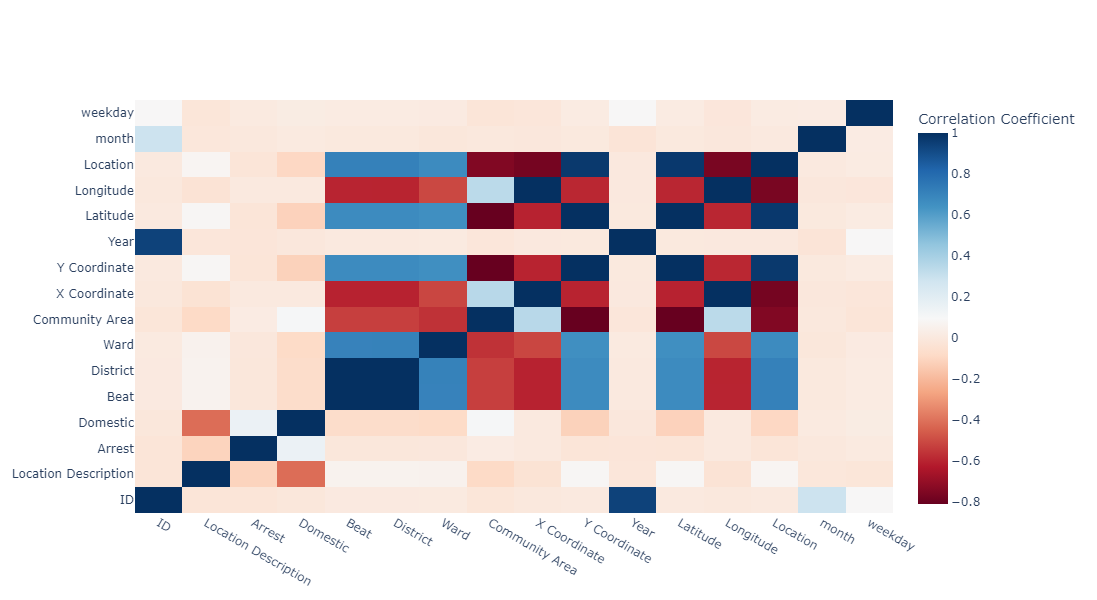

In [78]:
numeric_columns = cp_crime.select_dtypes(include=[np.number]).columns
# corelation = cp_crime[numeric_columns].corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corelation, annot=True)

numeric_columns = cp_crime.select_dtypes(include=[np.number]).columns
correlation = cp_crime[numeric_columns].corr()

from plotly.graph_objs import Figure, Heatmap
# Create a plotly figure object
fig = Figure()  # Set figure size

# Add heatmap trace
fig.add_trace(Heatmap(
    z=correlation.values,  # Correlation matrix values
    x=correlation.index,  # Column labels (numeric columns)
    y=correlation.index,  # Row labels (numeric columns)
    colorscale='RdBu',  # Set color scale (optional)
    colorbar_title="Correlation Coefficient",  # Set colorbar title (optional)
    text=correlation.values.round(2).astype(str),  # Text annotations for each cell
))

fig.update_layout(
    height=600
)

# Display the plotly heatmap
fig.show()

graph_json = pio.to_json(fig)

# exporting into json to display graphs in streamlit
with open("8_correlation_between_attributes.json", "w") as json_file:
    json_file.write(graph_json)

In [58]:
# month week day have low correlation they isn't effect our results so we drop them
# since beat have high correlation with district so we drop beat
# and X cordinate have high correlation with longitube and Y cordinate with latitude and location so we drop longitude and latitude
# 'Beat'
selected_cols=['Location Description','Arrest','Domestic','Beat','Ward','X Coordinate','Y Coordinate','Year'] 
X=cp_crime[selected_cols]
Y=cp_crime['crimeType']

In [59]:
selected_cols

['Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'Ward',
 'X Coordinate',
 'Y Coordinate',
 'Year']

In [60]:
from collections import Counter
counter=Counter(Y)

# before oversampling
print(Counter(Y))

# Total classes
np.unique(Y)

Counter({'1': 11655, '0': 8243, '2': 6622, '3': 3480})


array(['0', '1', '2', '3'], dtype=object)

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
# # oversampling using SMOTE
# oversample= SMOTE()
# X,Y = oversample.fit_resample(X,Y)

# # After overSampling
# print(Counter(Y))
# Y.isna().any(axis=0).sum()
# Y=Y.astype(int)
# Y.dtype
# for c in selected_cols:
#     print(f'{c}:{len(cp_crime[c].unique())}')
# sns.set_theme(style="whitegrid")
# #dropping domestic, x coordinate and y coordinate on the basis of correlation map
# selected_cols=['Location Description','Arrest','Beat','Ward','Community Area','Year','Location']      
# sns.boxplot(x=cp_crime['Location Description'])
# plt.show()
# sns.boxplot(x=cp_crime['Beat'])
# plt.show()
# sns.boxplot(x=cp_crime['Ward'])
# plt.show()
# sns.boxplot(x=cp_crime['Community Area'])
# plt.show()
# sns.boxplot(x=cp_crime['Year'])
# plt.show()
# sns.boxplot(x=cp_crime['Location'])
# plt.show()

# oversampling using SMOTE
oversample= SMOTE()
X,Y = oversample.fit_resample(X,Y)

In [63]:
# After overSampling
print(Counter(Y))

Counter({'2': 11655, '1': 11655, '0': 11655, '3': 11655})


In [64]:
X

Location Description  Arrest  Domestic      Beat  Ward  X Coordinate  \
0                  1.000000       0         0  0.165842   9.0      0.783596   
1                  1.000000       0         0  0.330446  12.0      0.580666   
2                  0.000000       0         0  0.999175  37.0      0.383917   
3                  1.000000       0         0  0.005363   2.0      0.679339   
4                  0.666667       0         0  0.541667   1.0      0.601025   
...                     ...     ...       ...       ...   ...           ...   
46615              0.333333       0         0  0.249030  15.0      0.615288   
46616              0.666667       0         0  0.582096  29.0      0.360833   
46617              1.000000       0         0  0.745935  46.0      0.659451   
46618              1.000000       1         0  0.540872  28.0      0.391762   
46619              1.000000       0         0  0.586485  28.0      0.401479   

       Y Coordinate  Year  
0          0.139767  2015  
1          0.496035  2015  
2          0.690299  2015  
3          0.605526  2015  
4          0.691513  2015  
...             ...   ...  
46615      0.371707  2015  
46616      0.608925  2015  
46617      0.822340  2015  
46618      0.630652  2015  
46619      0.621946  2015  

[46620 rows x 8 columns]

In [65]:
Y.isna().any(axis=0).sum()

0

In [66]:
Y=Y.astype(int)
Y.dtype

dtype('int32')

In [67]:
for c in selected_cols:
    print(f'{c}:{len(cp_crime[c].unique())}')

Location Description:4
Arrest:2
Domestic:2
Beat:270
Ward:50
X Coordinate:19351
Y Coordinate:21469
Year:5


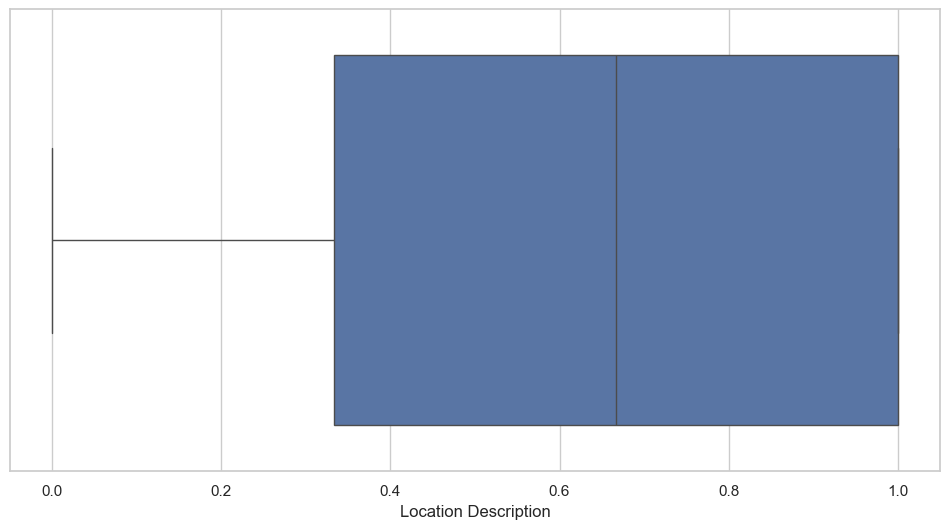

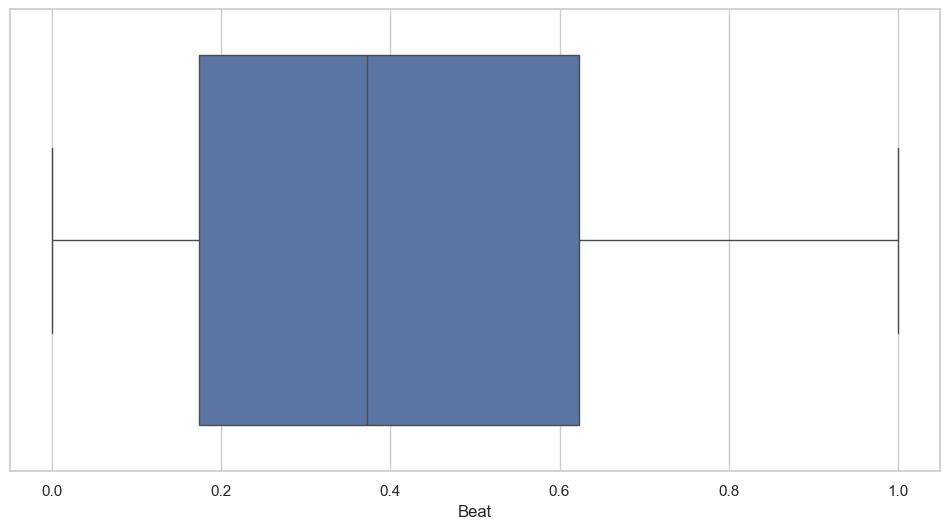

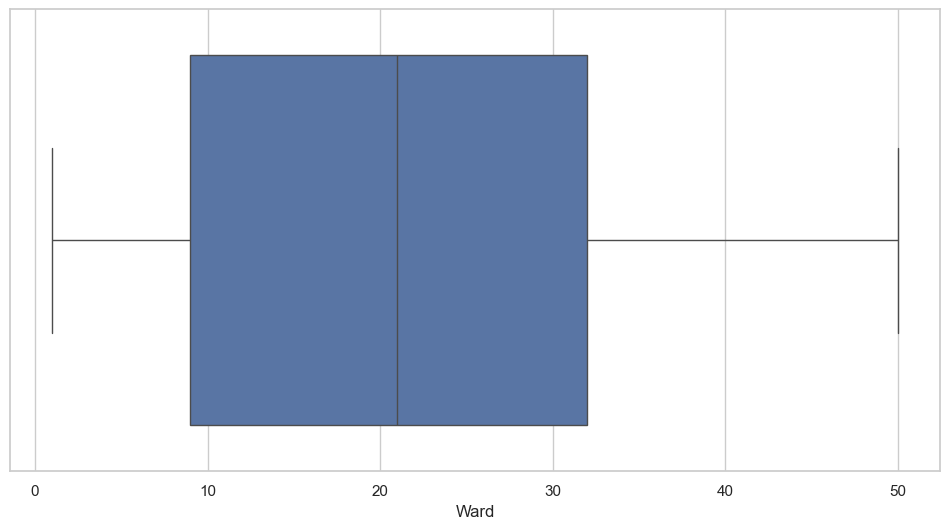

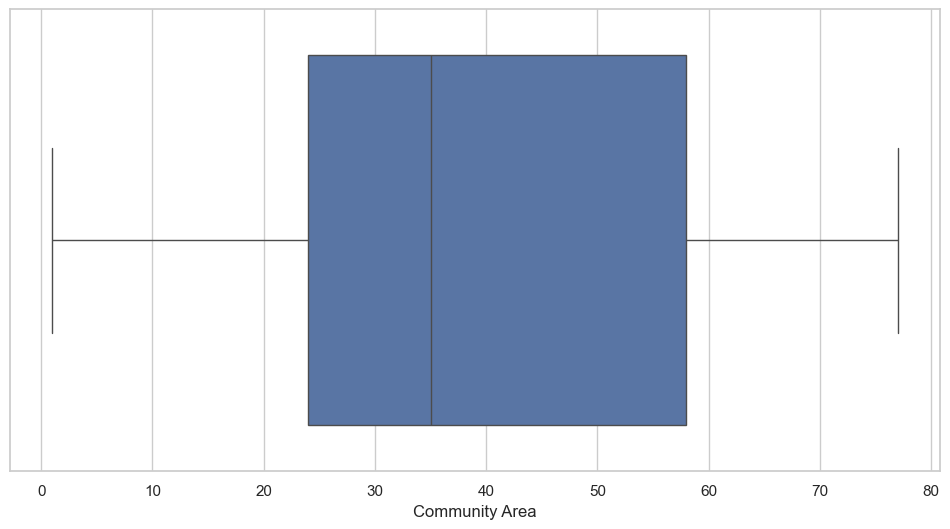

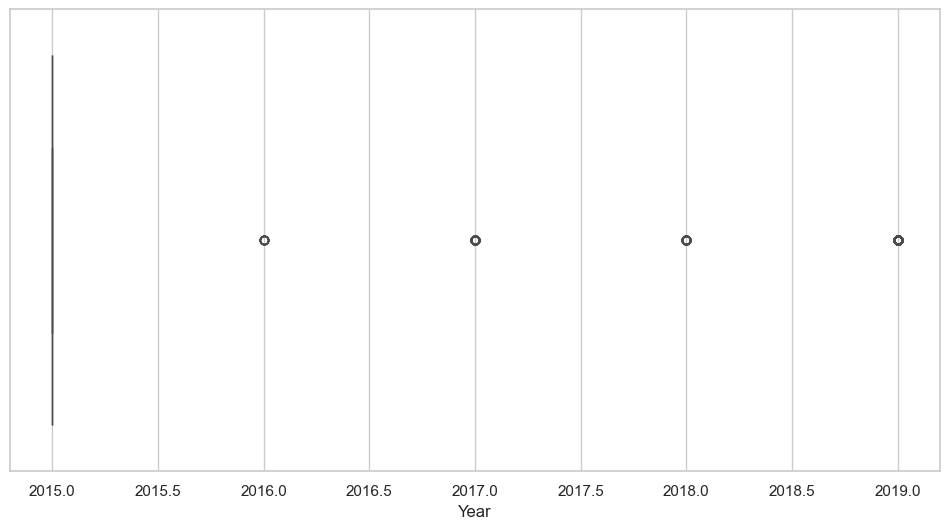

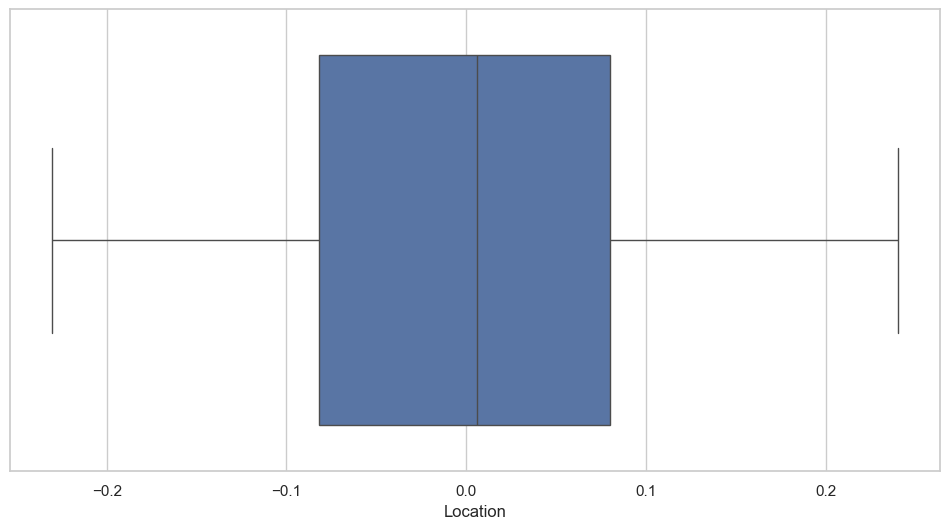

In [68]:
sns.set_theme(style="whitegrid")
#dropping domestic, x coordinate and y coordinate on the basis of correlation map
selected_cols=['Location Description','Arrest','Beat','Ward','Community Area','Year','Location']      
sns.boxplot(x=cp_crime['Location Description'])
plt.show()
sns.boxplot(x=cp_crime['Beat'])
plt.show()
sns.boxplot(x=cp_crime['Ward'])
plt.show()
sns.boxplot(x=cp_crime['Community Area'])
plt.show()
sns.boxplot(x=cp_crime['Year'])
plt.show()
sns.boxplot(x=cp_crime['Location'])
plt.show()